<a href="https://colab.research.google.com/github/tbahng/IST718-FinalProject/blob/master/Group_Project_718_Literature_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
import pandas as pd
import sklearn
import re
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import os
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import string
import seaborn as sns
import textblob
from textblob import TextBlob
import numpy as np
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV
import timeit
from PIL import Image
from sklearn.decomposition import LatentDirichletAllocation
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


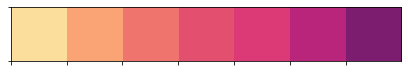

In [ ]:
import matplotlib.colors
# Create an array with the colors you want to use
colors = ["#FCDE9C","#FAA476","#F0746E","#E34F6F","#DC3977","#B9257A","#7C1D6F"]
sunsetdark = sns.set_palette(sns.color_palette(colors))
sns.palplot(sns.color_palette())
norm = matplotlib.colors.Normalize(-1,1)
colors = [[norm(-1.0), "#FCDE9C"],
          [norm(-0.7), "#FAA476"],
          [norm(-0.3),"#F0746E"],
          [norm(0.0),"#E34F6F"],
          [norm(0.3),"#DC3977"],
          [norm( 0.7), "#B9257A"],
          [norm( 1.0), "#7C1D6F"]]

SDcmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

#Obtain

In [ ]:
cord_DF = pd.read_csv('/content/drive/Shared drives/IST718-Summer2020-Team/Kaggle/metadata.csv',low_memory = False)


In [ ]:
cord_DF.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


#Scrub

In [ ]:
#Creating a List of Abstracts
abstractList = []

for nextAbs in cord_DF["abstract"]:
    abstractList.append(nextAbs)

wc_DF = pd.DataFrame(abstractList,columns =['Abstract'] )
wc_DF = wc_DF.dropna()
wc_DF.astype('str').dtypes
wc_DF.dtypes
print(wc_DF)

                                                 Abstract
0       OBJECTIVE: This retrospective chart review des...
1       Inflammatory diseases of the respiratory tract...
2       Surfactant protein-D (SP-D) participates in th...
3       Endothelin-1 (ET-1) is a 21 amino acid peptide...
4       Respiratory syncytial virus (RSV) and pneumoni...
...                                                   ...
195703  We established the COVID (Co-OperativeVascular...
195704  Isatis tinctoria L. (Brassicaceae), which is c...
195705  The year 2020 will mark a once‐in‐a‐century gl...
195706  During 25 years of research since HIV-1 was fi...
195709  Interview with Mala Murthy, who studies the ne...

[139874 rows x 1 columns]


#Explore

There are 188528124 words in the combination of all abstracts.
frozenset({'besides', 'me', 'who', 'thus', 'anyhow', 'her', 'whether', 'bill', 'thence', 'noone', 'the', 'therein', 'after', 'herself', 'sometime', 'him', 'third', 'becomes', 'himself', 'get', 'what', 'than', 'already', 'both', 'full', 'call', 'these', 'those', 'bottom', 'front', 'nobody', 'except', 'take', 'mill', 'fill', 'do', 'sometimes', 'hereafter', 'mine', 'whither', 'nevertheless', 'any', 'cant', 'nine', 'most', 'forty', 'thick', 'first', 'nowhere', 'us', 'during', 'whenever', 'here', 'least', 'neither', 'no', 'always', 'anyone', 'his', 'again', 'side', 'become', 'hundred', 'none', 'whole', 'con', 'itself', 'out', 'together', 'when', 'seemed', 'not', 'else', 'herein', 'via', 'yourself', 'done', 'other', 'anyway', 'should', 'has', 'much', 'seems', 'couldnt', 'yourselves', 'eleven', 'off', 'ourselves', 'top', 'fifty', 'anywhere', 'be', 'often', 'someone', 'how', 'describe', 'many', 'whoever', 'since', 'to', 'my', 'here

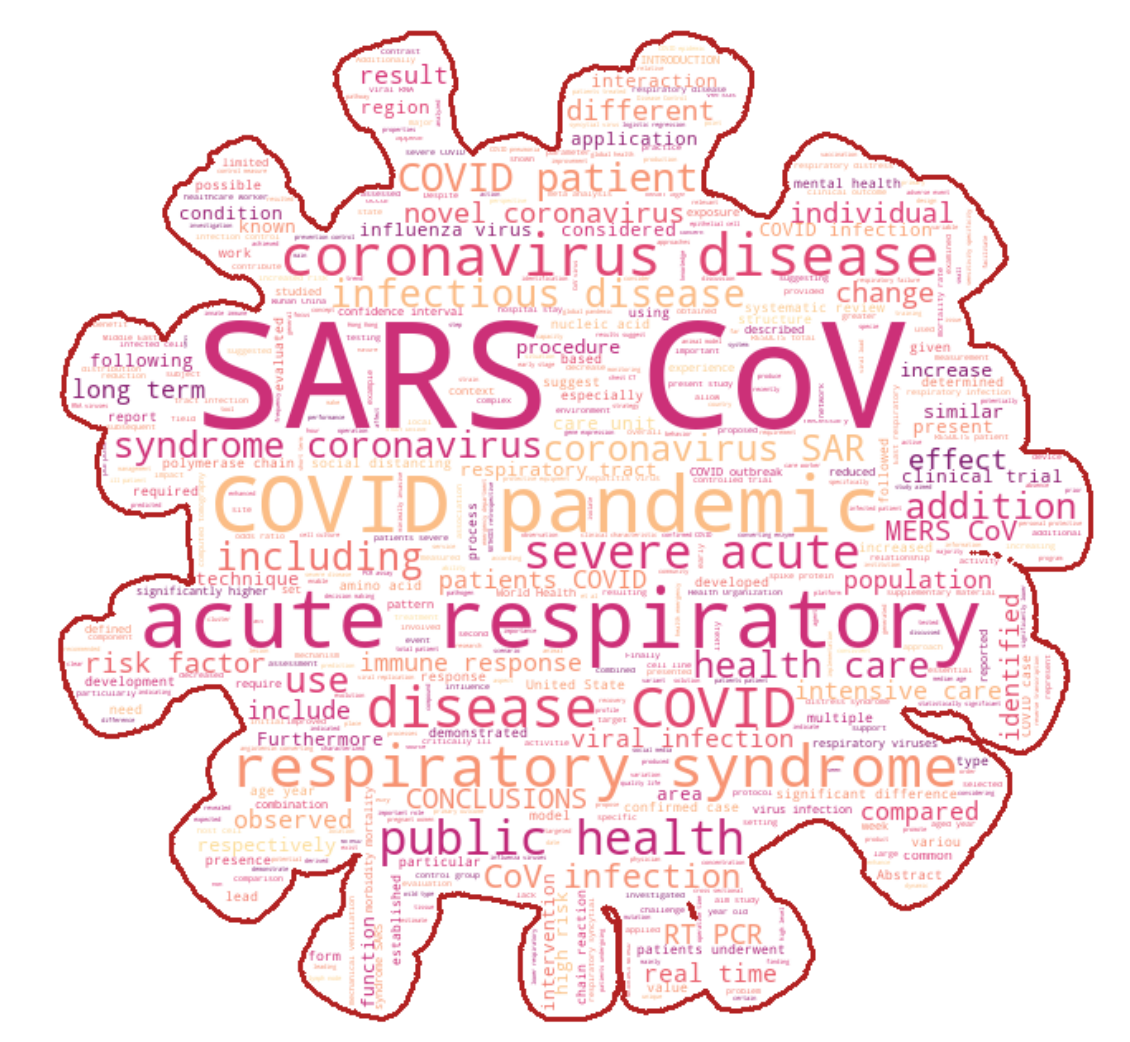

In [ ]:
abstracttext = " ".join(abstract for abstract in wc_DF.Abstract)
print ("There are {} words in the combination of all abstracts.".format(len(abstracttext)))
my_stop_words = text.ENGLISH_STOP_WORDS.union(["objective","background","conclusion"])
print(my_stop_words)
covid_mask = np.array(Image.open("/content/drive/My Drive/coronavirus.png"))
covid_mask
image_colors = ImageColorGenerator(covid_mask)
wc = WordCloud(background_color="white", max_words=1000, mask=covid_mask, stopwords=my_stop_words,
               max_font_size=90, random_state=42, contour_width=3, contour_color='firebrick',colormap = SDcmap)
wc.generate(abstracttext)
plt.figure(figsize=[20,20])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
import nltk
# Uncomment the stopwords download below before running the first time in a session. Recomment it for other runnings in a given session.
nltk.download('stopwords')
# Stem words to reduce features
STEMMER=PorterStemmer()
print(STEMMER.stem("fishers"))
stop_words = set(stopwords.words("english"))

#add words that aren't in the NLTK stopwords list
new_stopwords = ["objective","background","conclusion","patient","coronavirus",'covid','19',"covid-19","patients"]
new_stopwords_list = stop_words.union(new_stopwords)

print(new_stopwords_list)

# Use NLTK's PorterStemmer in a function
def MY_STEMMER(str_input):
    words = re.sub(r"[^A-Za-z\-]", " ", str_input).lower().split()
    words = [STEMMER.stem(word) for word in words]
    return words
# Instantiate the count vectorizer to use in LDA -- Kept Crashing
#cv = CountVectorizer(input='content',stop_words=new_stopwords_list,tokenizer=MY_STEMMER,max_features=10000)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
fisher
{'mightn', 'between', 'me', 'who', 'aren', 'can', 'her', "isn't", 'is', 'had', "needn't", 'your', 'covid', 'the', 'have', 'hasn', 'or', 'after', "shouldn't", 'herself', 'very', '19', "should've", 'shan', 'haven', 'him', 'himself', "wouldn't", 'been', 'what', "you'd", "doesn't", 'wouldn', 'than', "hasn't", 'those', 'about', 'both', 'these', 'did', 'just', 'don', 'as', 'couldn', "mustn't", 'will', "she's", 'having', 'above', 'do', 'if', 'by', 'any', 'most', "mightn't", 'with', 'over', 'during', 'll', 'themselves', 'and', 'of', 'here', 'no', 'background', 'his', 'again', "you'll", 'm', "shan't", "couldn't", 'but', "wasn't", 'at', 'an', 'them', 'she', 'itself', 'o', 'below', 'out', 'when', 'mustn', 'not', 'are', 'i', 'd', 'yourself', 'other', 'hers', 'in', 'should', 'has', "it's", "weren't", 'covid-19', 'ma', 'yourselves', 'ourselves', 'off', 'be', 'how', 'patient', 'it', "

In [ ]:
# Due to crashing count vectorizer this section is commented out until I can try something else
# Fit count vectorizer to the abstracts
#count_DTM = cv.fit_transform(wc_DF['Abstract'])
#names = cv.get_feature_names()
#count_DF = pd.DataFrame(count_DTM.toarray(),columns = names)
#print(count_DF.head())

In [ ]:
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette=["#7C1D6F","#9B2175","#B9257A","#CB2F79","#DC3977","#E34F6F","#F0746E","#FAA476","#FBC189","#FCDE9C"])
    plt.xticks(x_pos, words, rotation=45) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()


In [ ]:
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words=new_stopwords_list,max_features=100000)
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(wc_DF['Abstract'])

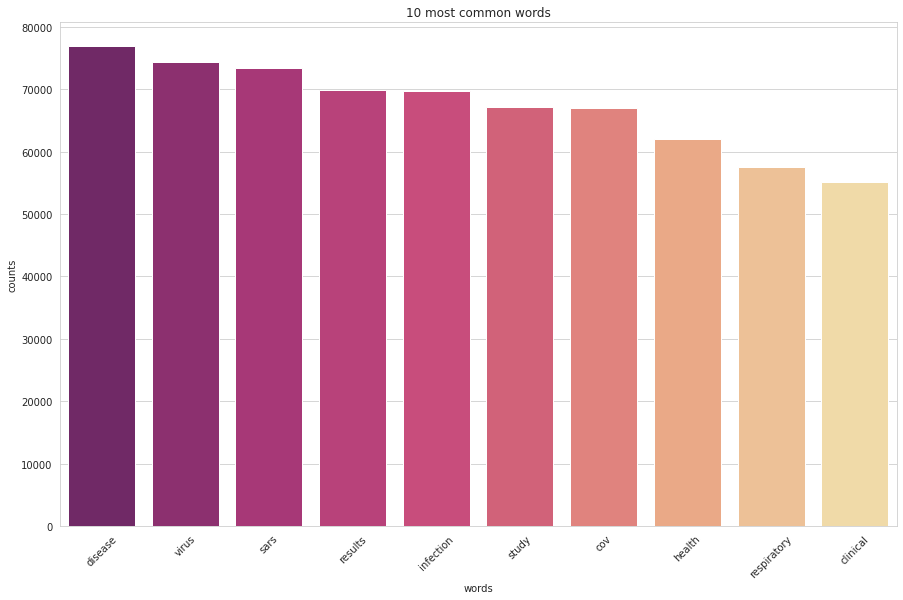

In [ ]:
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [ ]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 20
number_words = 10
# Create and fit the LDA model
#lda_model = LatentDirichletAllocation(n_components=number_topics, max_iter=10, learning_method='online')
#LDA_Model = lda_model.fit_transform(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda_model, count_vectorizer, number_words)


In [ ]:
!pip install pyldavis


     |████████████████████████████████| 1.6MB 2.5MB/s 
     |████████████████████████████████| 552kB 18.6MB/s 
  Created wheel for pyldavis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=05d8ab43eb984bdeeebb1f711659bf3b8c61baeceb02c461cd64dc1f5eb5f1e0
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=31676855b0c908c351180dfed83360bf05bf8d9b9b799d3bb63b0b1b8fe9aaaa
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyldavis funcy


In [ ]:
import pyLDAvis.sklearn as LDAvis
import pyLDAvis
panel = LDAvis.prepare(lda_model, count_data,count_vectorizer, mds='tsne')
pyLDAvis.display(panel)

In [ ]:
pyLDAvis.save_html(panel, '/content/drive/Shared drives/IST718-Summer2020-Team/Randall Viz - HTML/lda.html')


# LDA Lists Plot

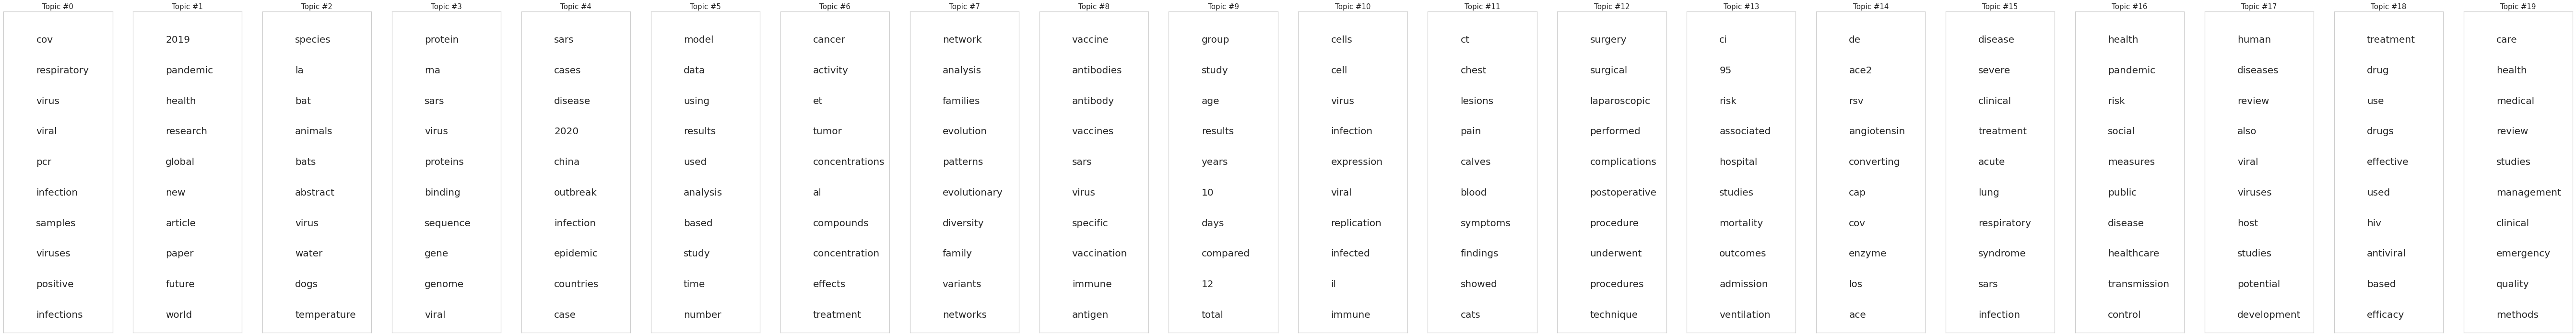

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

vocab = count_vectorizer.get_feature_names()
word_topic = np.array(lda_model.components_)
#print(word_topic)
word_topic = word_topic.transpose()

num_top_words = 10
vocab_array = np.asarray(vocab)

plt.figure(figsize=[75,10])
#fontsize_base = 70 / np.max(word_topic) # font size for word with largest share in corpus
fontsize_base = 20

for t in range(number_topics):
    plt.subplot(1, number_topics, t + 1)  # plot numbering starts with 1
    plt.ylim(0, num_top_words + 0.5)  # stretch the y-axis to accommodate the words
    plt.xticks([])  # remove x-axis markings ('ticks')
    plt.yticks([]) # remove y-axis markings ('ticks')
    plt.title('Topic #{}'.format(t))
    top_words_idx = np.argsort(word_topic[:,t])[::-1]  # descending order
    top_words_idx = top_words_idx[:num_top_words]
    top_words = vocab_array[top_words_idx]
    top_words_shares = word_topic[top_words_idx, t]
    for i, (word, share) in enumerate(zip(top_words, top_words_shares)):
        plt.text(0.3, num_top_words-i-0.5, word, fontsize=fontsize_base)
                 ##fontsize_base*share)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=1000, verbose=1, random_state=0, angle=0.75)
tsne_features = model.fit_transform(LDA_Model)
df = pd.DataFrame(tsne_features)
df['topic'] = LDA_Model.argmax(axis=1)
df.columns = ['TSNE1', 'TSNE2', 'topic']


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 139874 samples in 0.736s...
[t-SNE] Computed neighbors for 139874 samples in 699.509s...
[t-SNE] Computed conditional probabilities for sample 1000 / 139874
[t-SNE] Computed conditional probabilities for sample 2000 / 139874
[t-SNE] Computed conditional probabilities for sample 3000 / 139874
[t-SNE] Computed conditional probabilities for sample 4000 / 139874
[t-SNE] Computed conditional probabilities for sample 5000 / 139874
[t-SNE] Computed conditional probabilities for sample 6000 / 139874
[t-SNE] Computed conditional probabilities for sample 7000 / 139874
[t-SNE] Computed conditional probabilities for sample 8000 / 139874
[t-SNE] Computed conditional probabilities for sample 9000 / 139874
[t-SNE] Computed conditional probabilities for sample 10000 / 139874
[t-SNE] Computed conditional probabilities for sample 11000 / 139874
[t-SNE] Computed conditional probabilities for sample 12000 / 139874
[t-SNE] Computed conditional prob

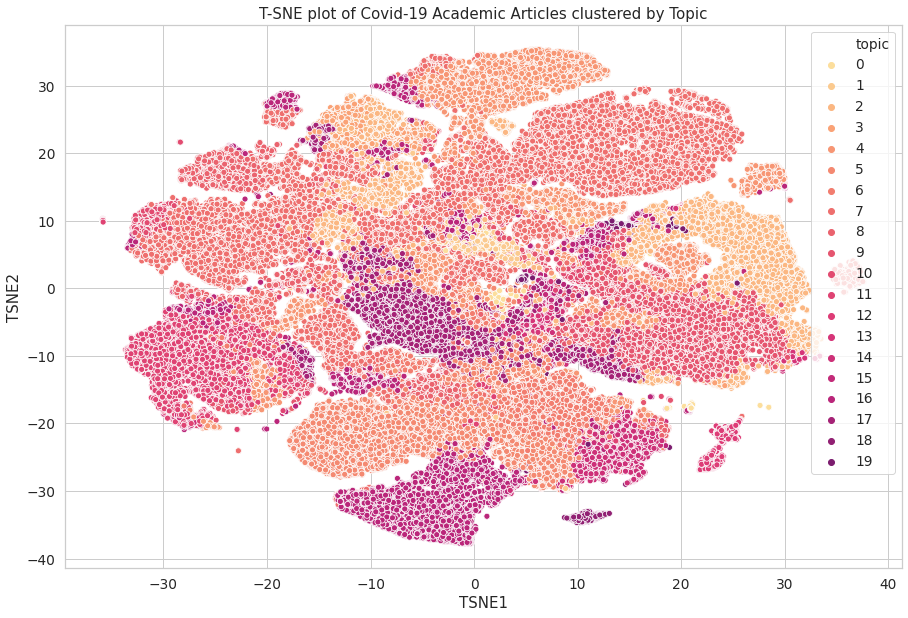

In [ ]:
plt.figure(figsize=(15, 10))
plt.title('T-SNE plot of Covid-19 Academic Articles clustered by Topic')
ax = sns.scatterplot(x = 'TSNE1', y = 'TSNE2', palette=SDcmap ,hue = 'topic', data = df, legend = 'full')
plt.show()

In [ ]:
def print_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic:  ", idx)
      
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]])
                        ## gets top n elements in decreasing order
    

####### call the function above with our model and CountV
print_topics(lda_model, count_vectorizer)


Topic:   0
[('2019', 9745.419383491055), ('ace2', 8253.981990646427), ('ncov', 5156.126510237631), ('angiotensin', 4693.997719275277), ('converting', 2538.655011463048), ('enzyme', 2467.847362679274), ('chinese', 2456.5164914819197), ('ii', 2316.569431595395), ('text', 2170.2909608624495), ('see', 2108.3285294699353)]
Topic:   1
[('air', 5082.215802619728), ('temperature', 3380.7391333586115), ('concentration', 3243.705125805364), ('pigs', 3221.3473982848727), ('concentrations', 3207.6626363149885), ('prrsv', 2863.124220743698), ('effect', 2672.8392903477243), ('effects', 2609.2506730368327), ('porcine', 2529.6358396675), ('high', 2206.7854543594494)]
Topic:   2
[('treatment', 23246.077143427952), ('clinical', 20310.96917581567), ('studies', 15541.000334641803), ('surgery', 13004.81714184586), ('outcomes', 12119.470745136274), ('risk', 11113.363757272517), ('results', 10650.45083584376), ('surgical', 10138.302903848033), ('performed', 9811.535316236794), ('complications', 9344.51451276